In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

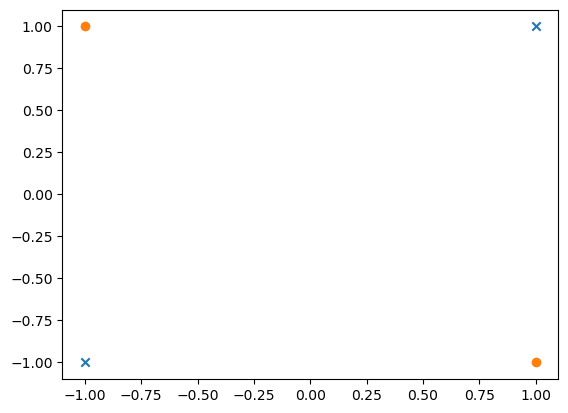

In [21]:
# define the XOR problem
X = np.array((
    (-1,-1),
    (1,1),
    (1,-1),
    (-1,1)
))
y = np.array((0,0,1,1))
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker='x')
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker='o')

In [22]:
# compute a sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def d_sigmoid(x):
    return sigmoid(x) * (1-sigmoid(x))

# tanh units
def tanh(x):
    return np.tanh(x)

# derivative of tanh
def d_tanh(x):
    return 1 - np.tanh(x)**2
    
# ReLU units
def ReLU(x):
    return np.maximum(0, x)
# derivative of relu
def d_ReLU(x):
    return x>0

def MSE(t, y):
    return 1/2 * np.sum((t - y)**2)

In [23]:
# initialize model arch
def init_params(num_in, num_h, num_out):
    W1 = np.random.randn(num_in, num_h)
    b1 = np.zeros((num_h, 1))
    W2 = np.random.randn(num_h, num_out)
    b2 = np.zeros((num_out, 1))
    return W1, b1, W2, b2
    
# forward propogate a batch of data
def Fprop(X, W1, b1, W2, b2):
    Z0 = X.T # D x N
    A1 = W1.T @ Z0 + b1 # (D x num_hidden).T x (D x N) = num_hidden x N
    # activation func
    Z1 = tanh(A1)
    A2 = W2.T @ Z1 + b2 # (num_h x num_out).T x (num_h x N) = num_out x N
    # activation func
    Z2 = sigmoid(A2) # num_out x N
    return A1, Z1, A2, Z2

def train(X,Y, num_in,num_h,num_out, epochs=10000, rate=0.1):
    W1, b1, W2, b2 = init_params(num_in,num_h,num_out)
    costs = []
    plt.figure()  # Create a new figure
    for i in range(epochs):
        # Forward pass the data
        A1, Z1, A2, Z2 = Fprop(X, W1, b1, W2, b2)
        if np.all(np.round(Z2)==y):
            print("100% Acc")
            break
        # Measure the cost of the prediction
        cost = MSE(Y, Z2)
        costs.append(cost)
        # Compute gradients for output layer
        dZ2 = Z2 - Y
        # dZ2 = sigmoid((1-2*y)*Z2)*(1-2*y)
        dA2 = dZ2 * d_sigmoid(A2)
        dW2 = (dA2 @ Z1.T).T
        db2 = np.sum(dA2, axis=1, keepdims=True)
        # Compute gradients for hidden layer
        dZ1 = (dA2.T @ W2.T).T
        dA1 = dZ1 * d_tanh(A1)
        dW1 = (dA1 @ X).T
        db1 = np.sum(dA1, axis=1, keepdims=True)
    
        # update the weights
        W2 -= rate*dW2
        W1 -= rate*dW1
        b1 -= rate*db1
        b2 -= rate*db2

        # Plot the cost in 'real-time'
        if i % 10 == 0:
            plt.clf()
            plt.plot(costs)
            plt.xlabel('Iteration')
            plt.ylabel('Cost')
            plt.title('Cost over Iterations')
            plt.show()
        
    return W1, b1, W2, b2, costs

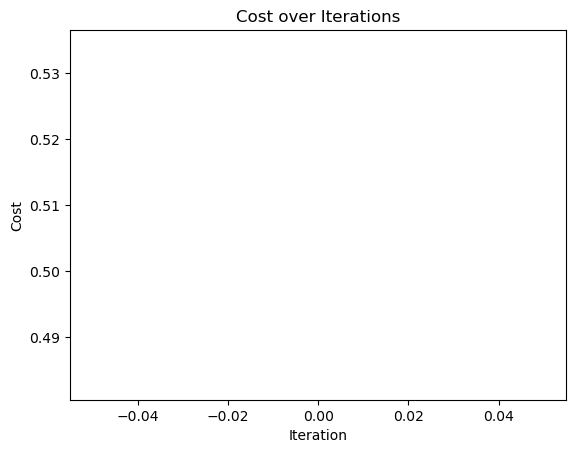

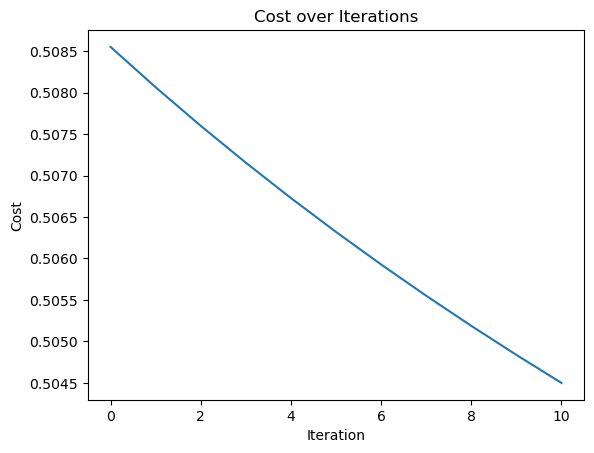

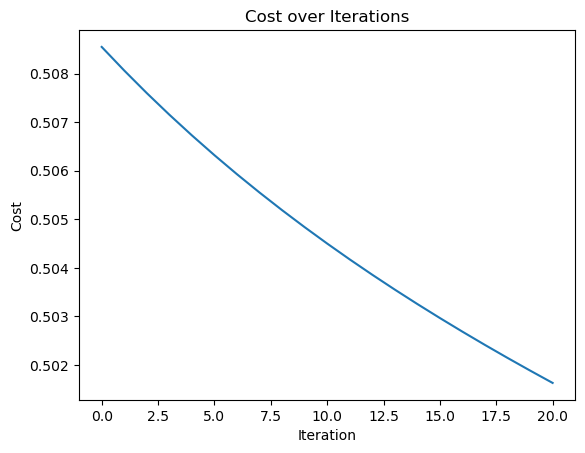

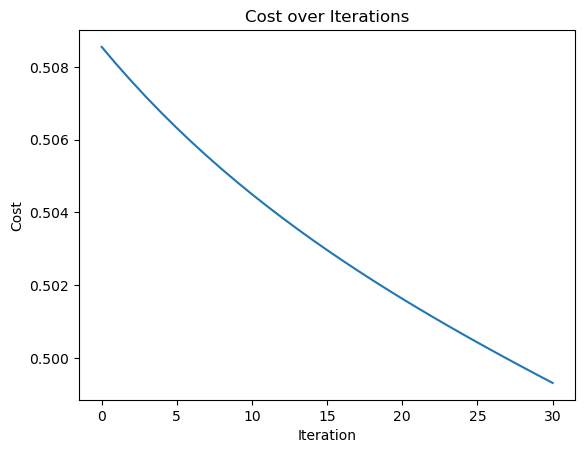

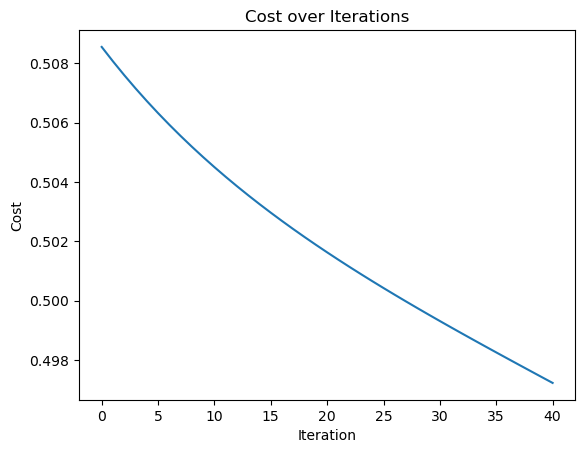

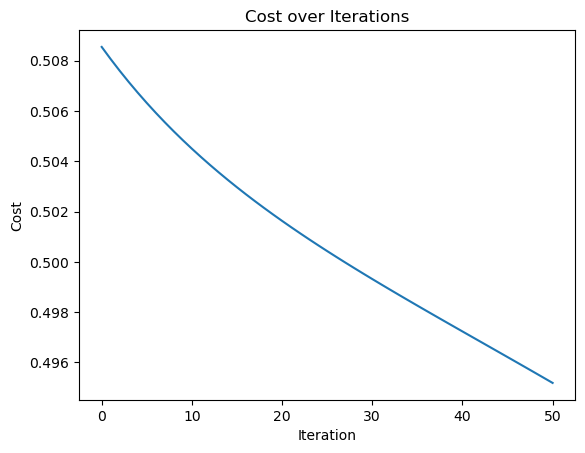

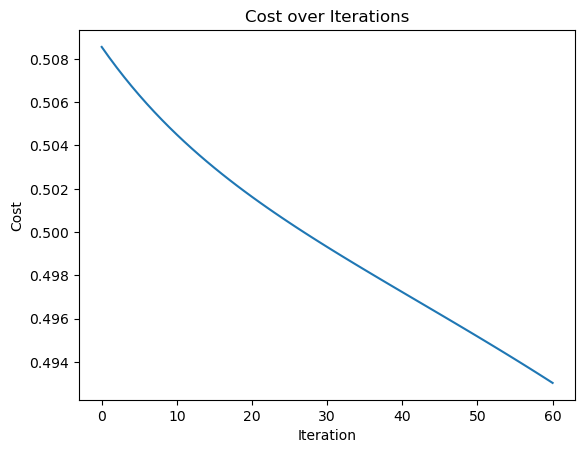

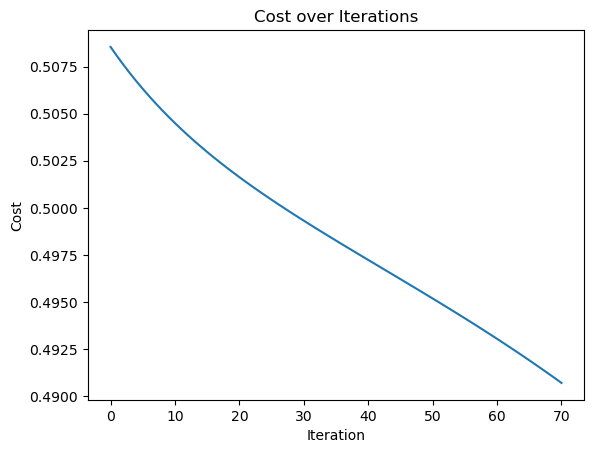

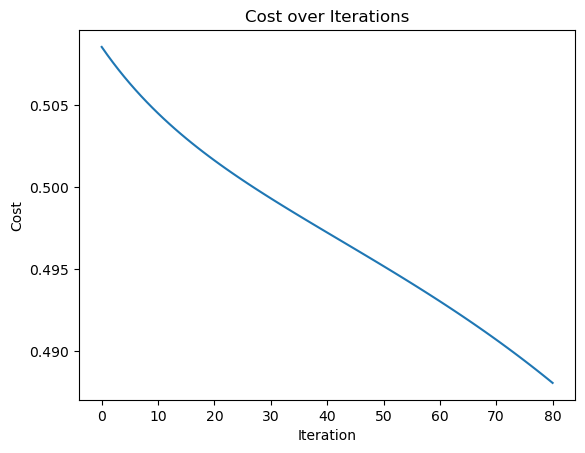

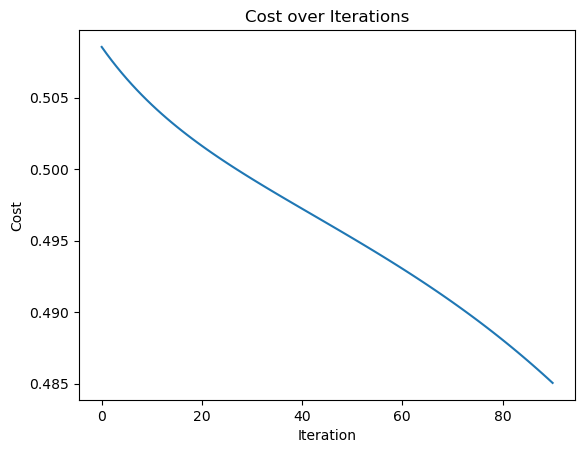

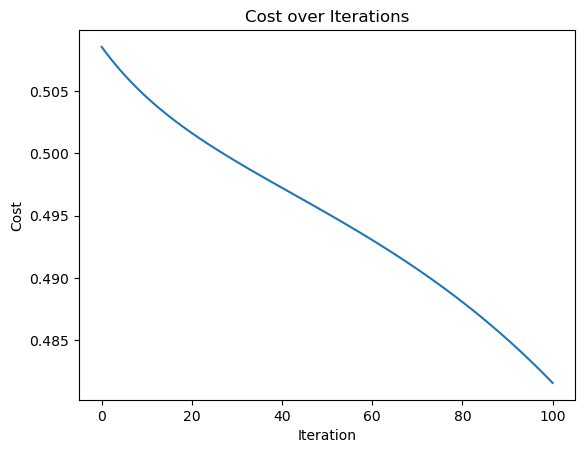

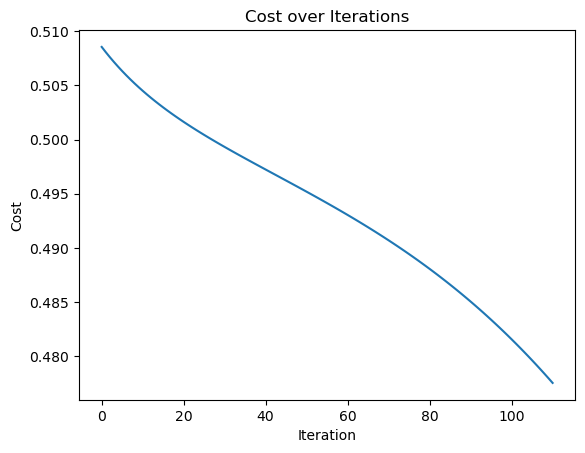

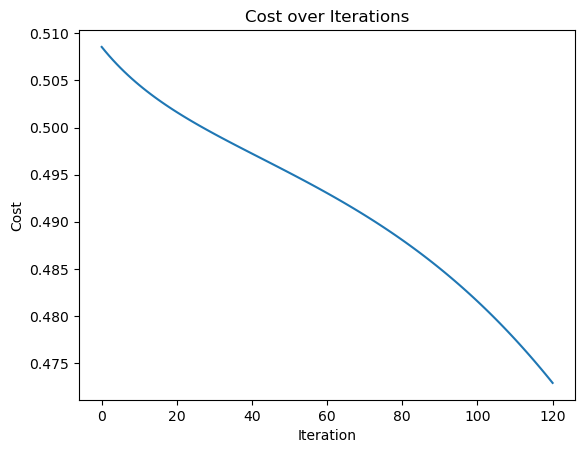

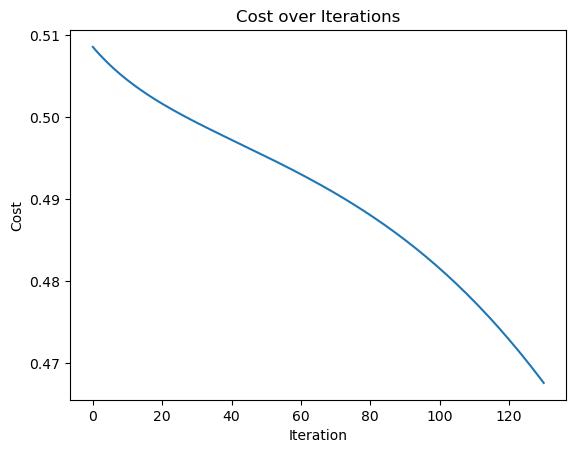

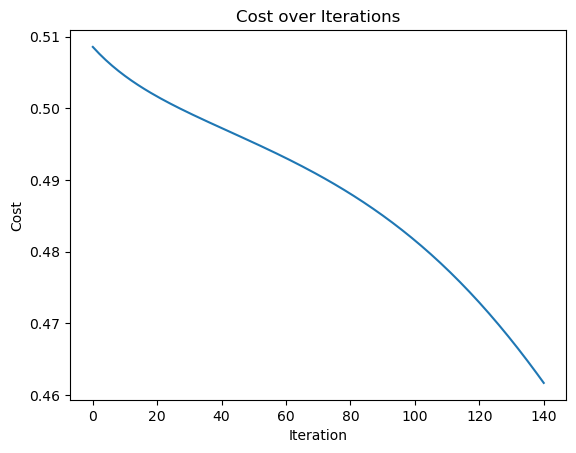

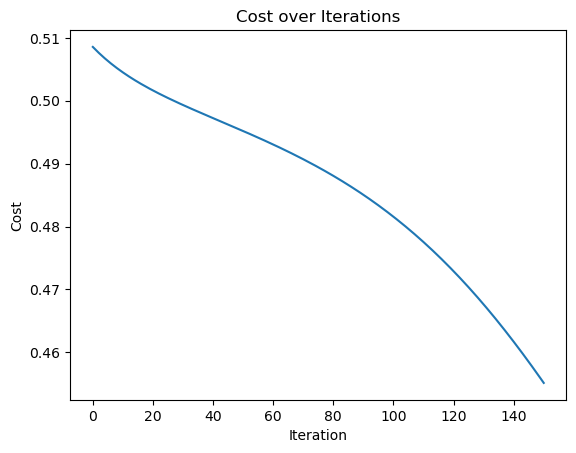

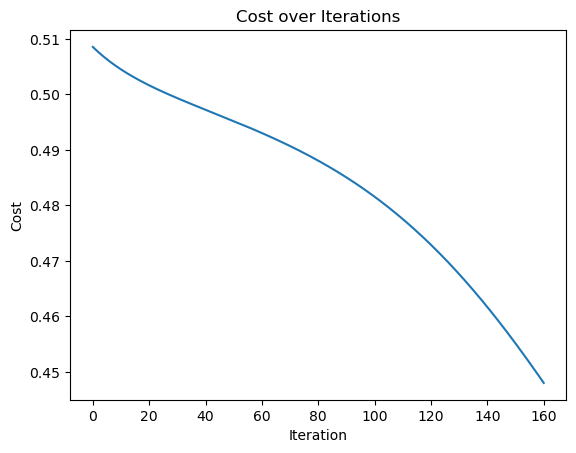

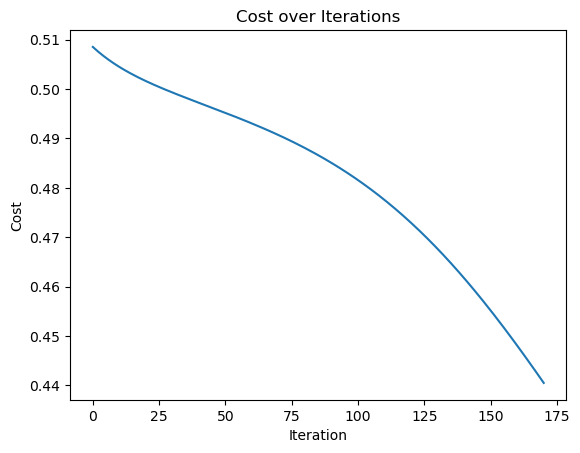

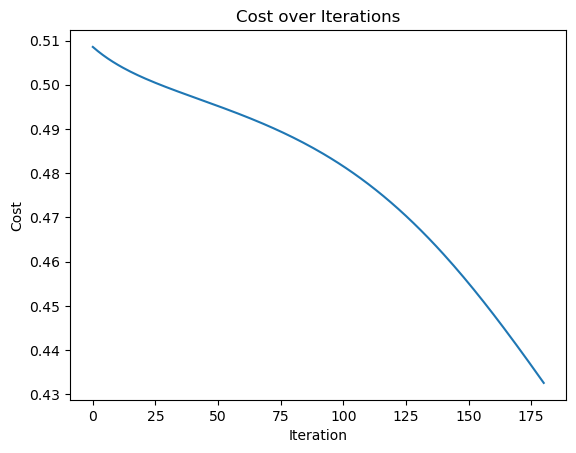

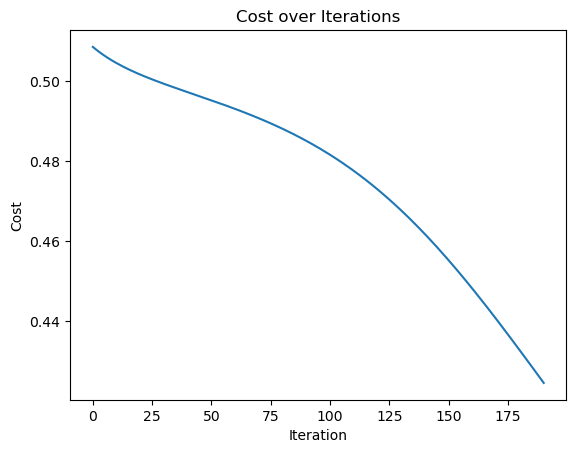

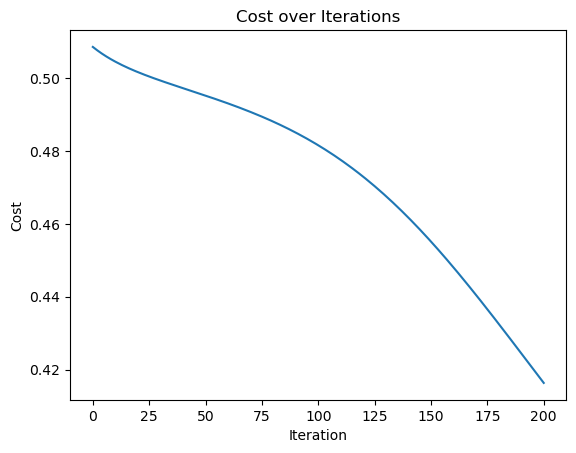

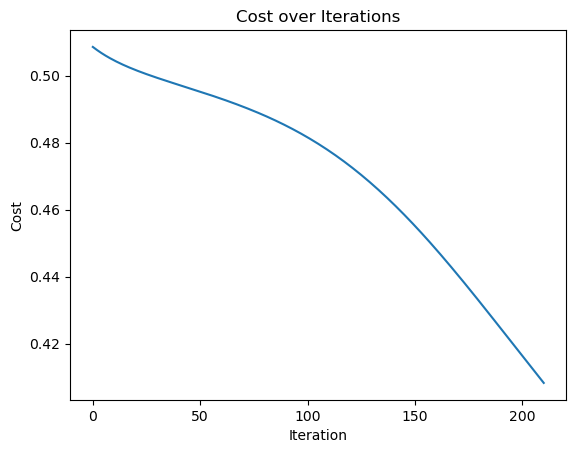

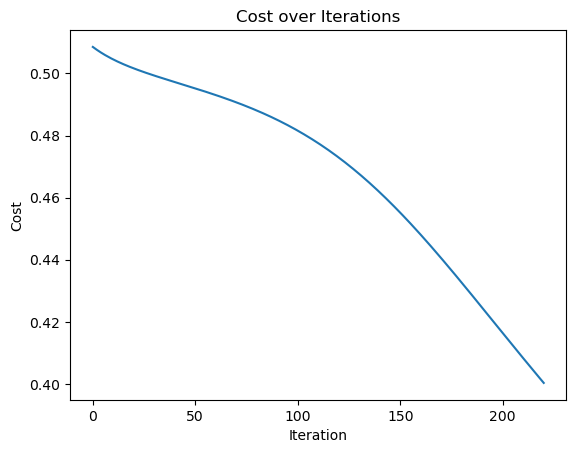

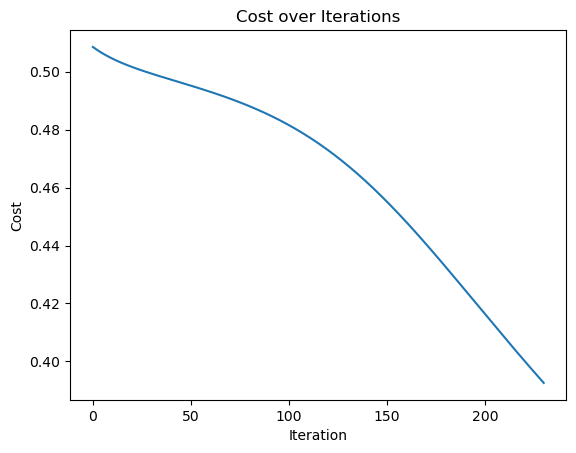

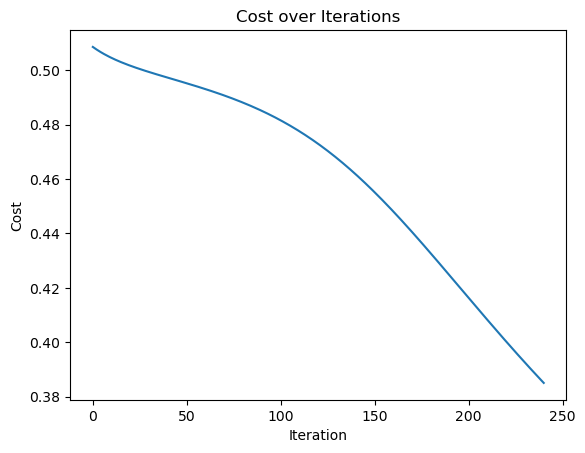

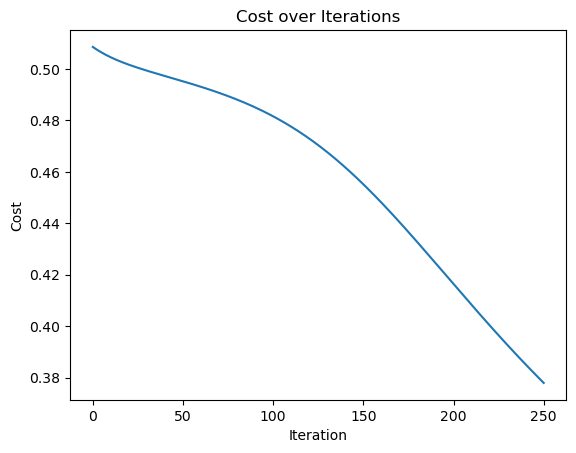

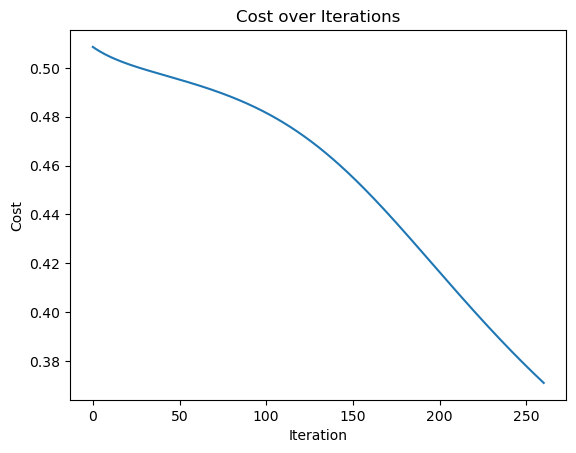

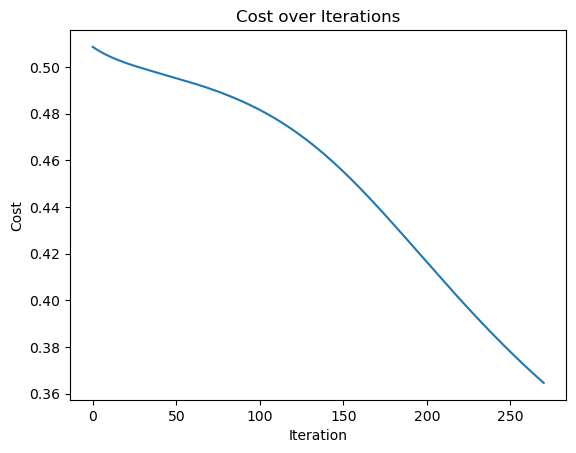

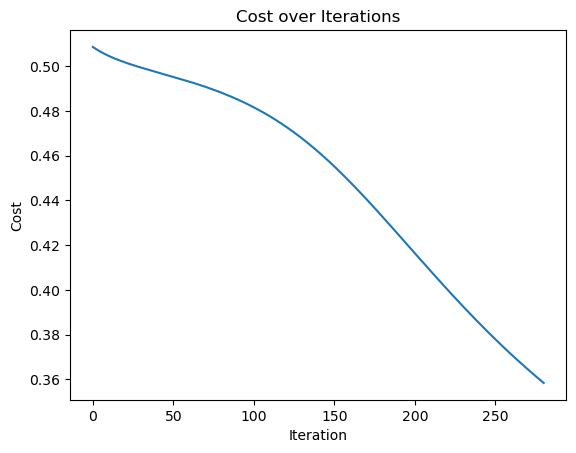

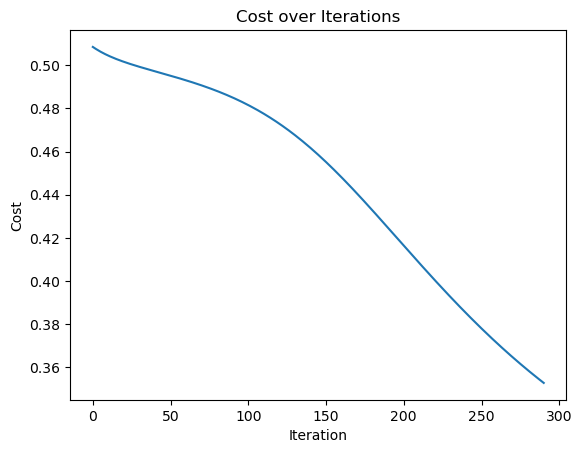

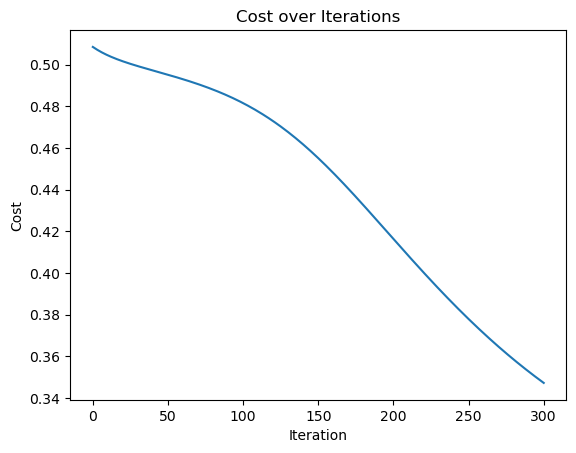

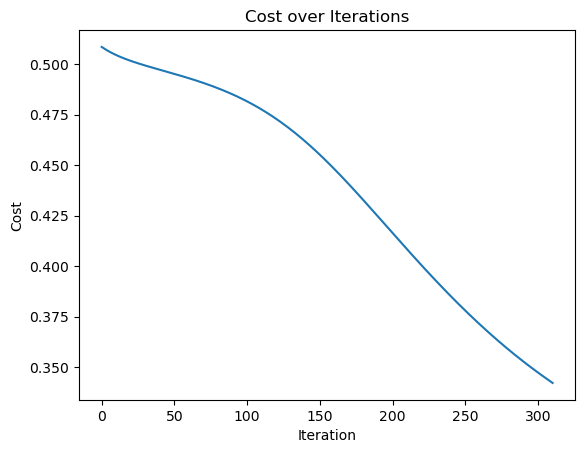

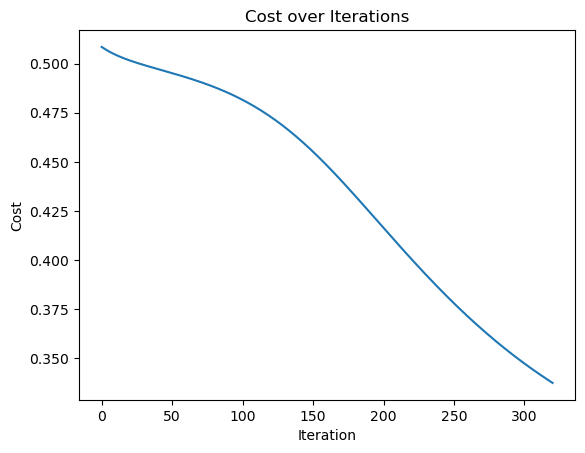

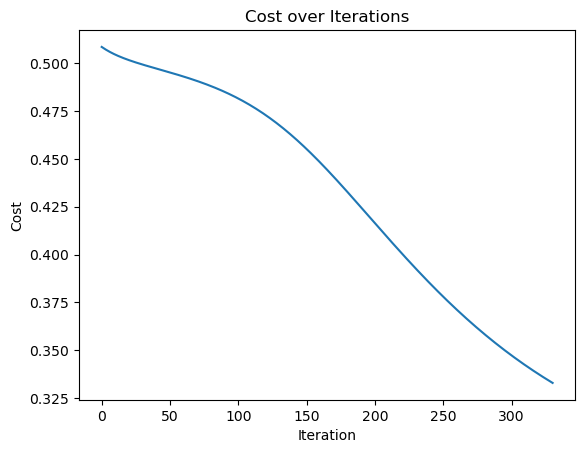

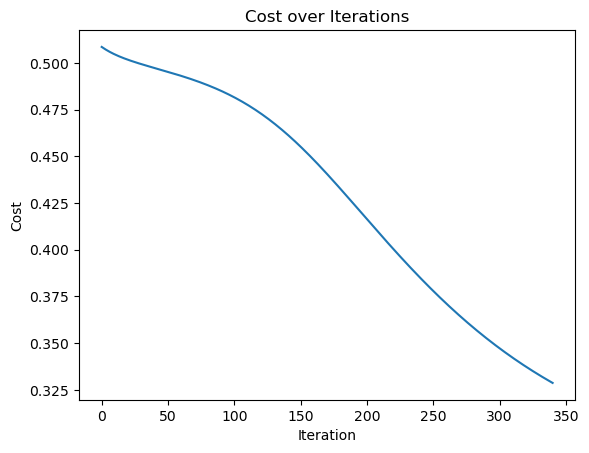

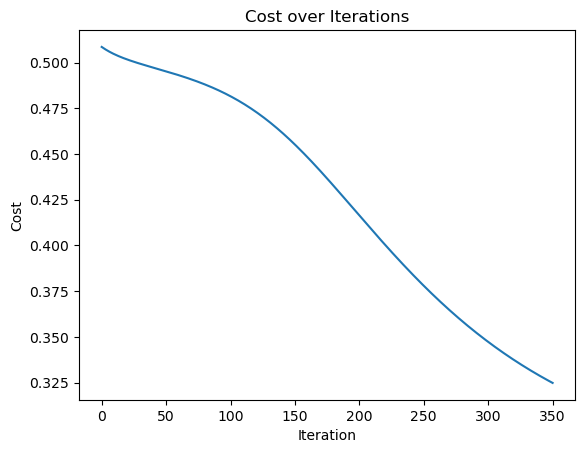

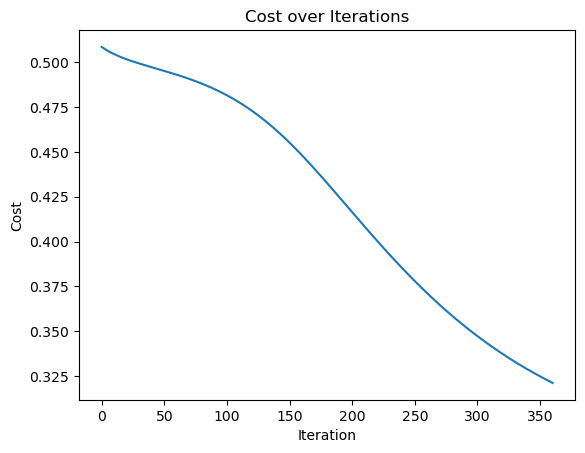

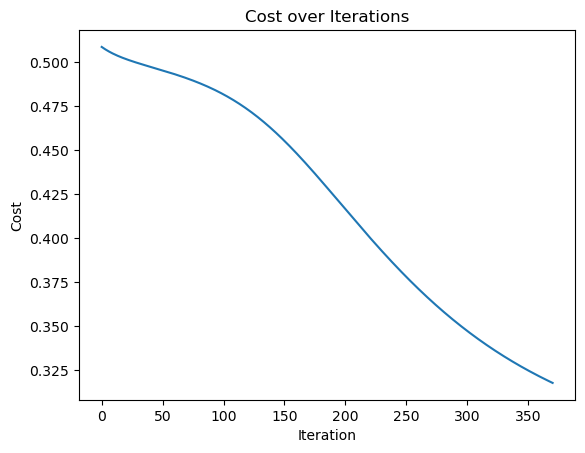

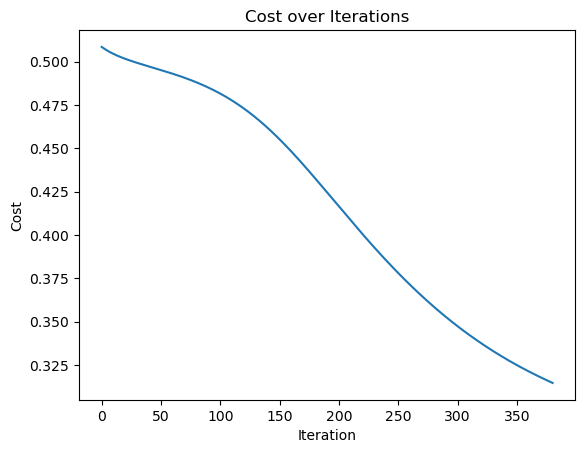

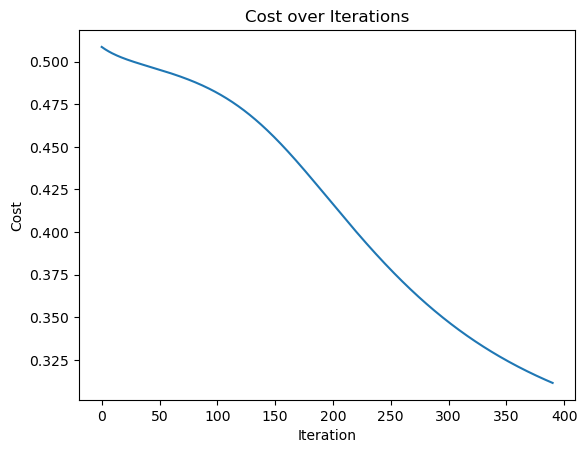

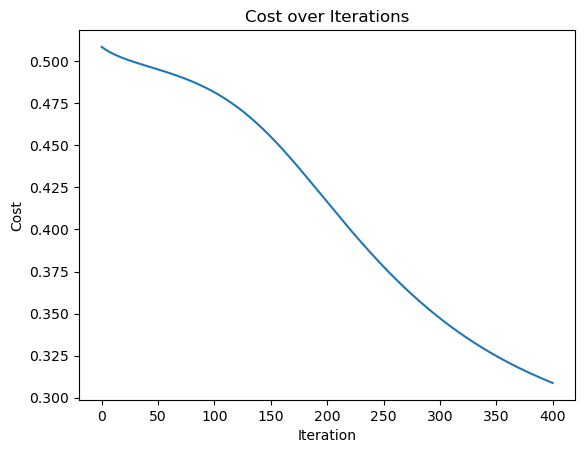

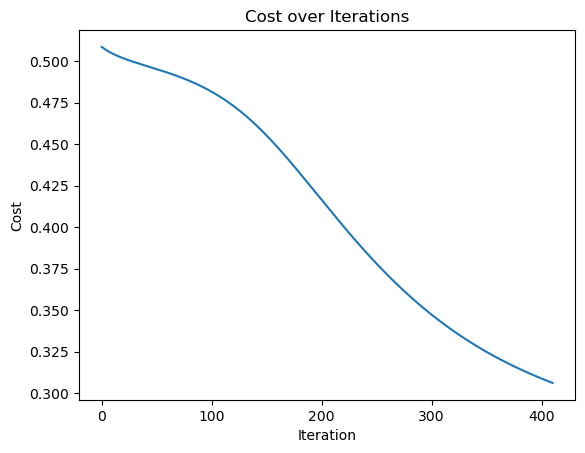

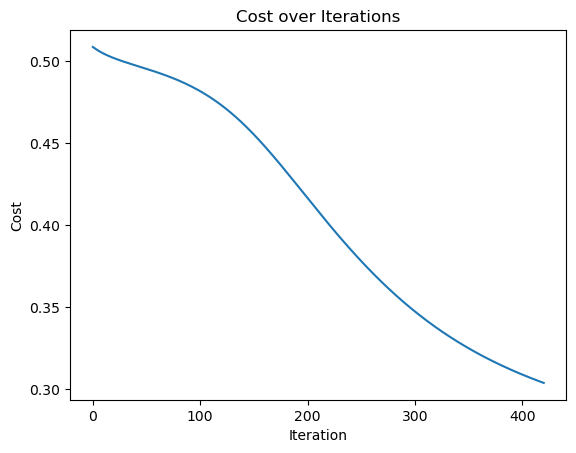

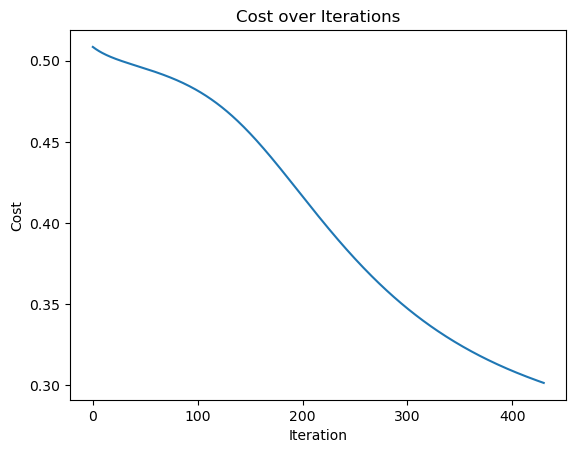

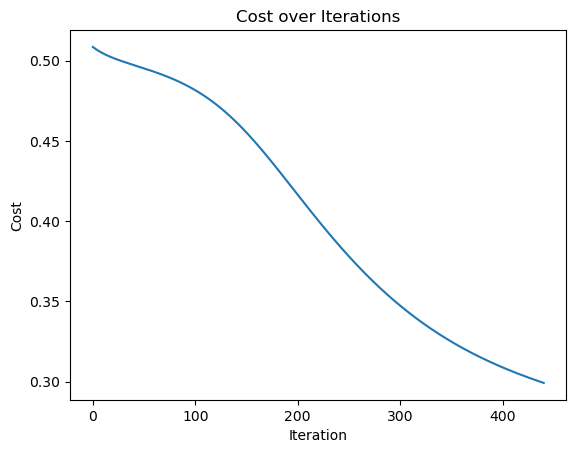

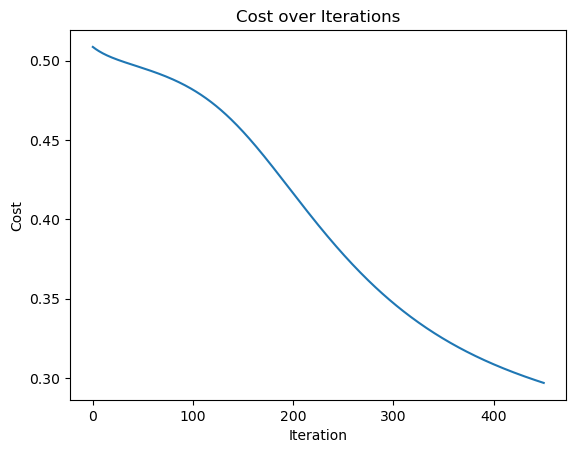

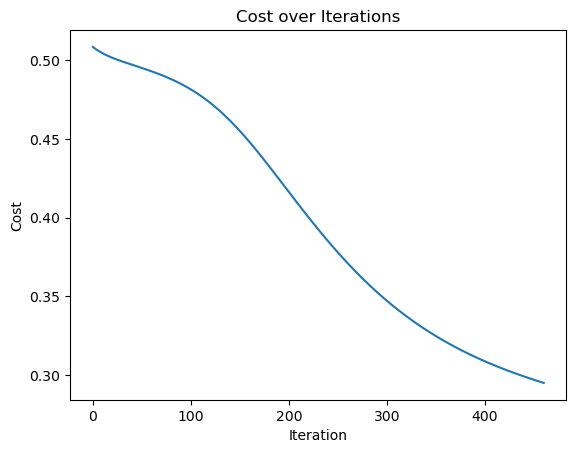

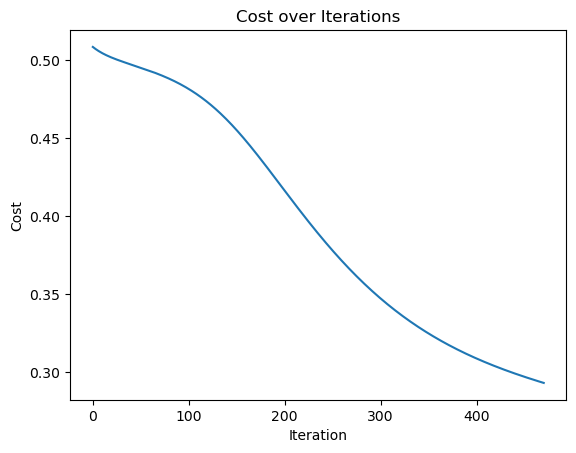

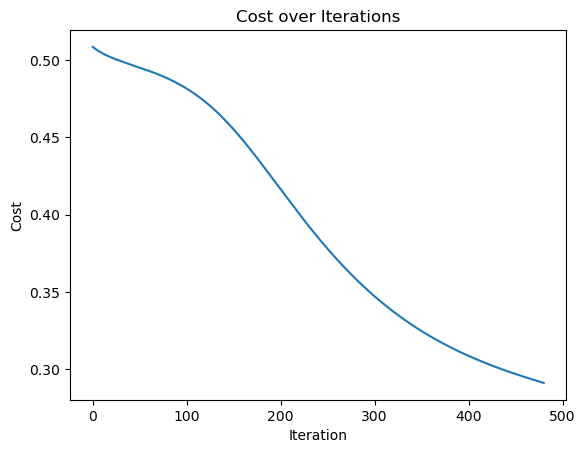

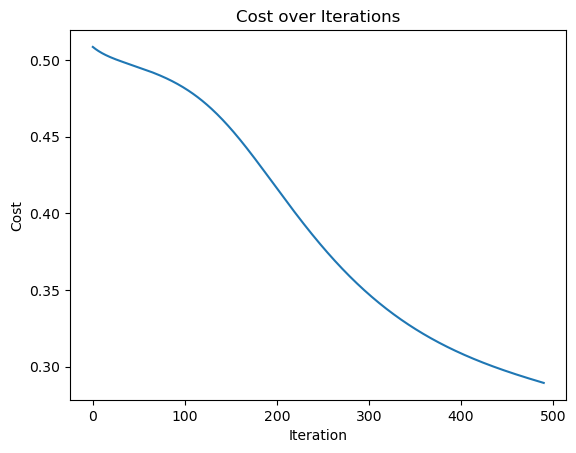

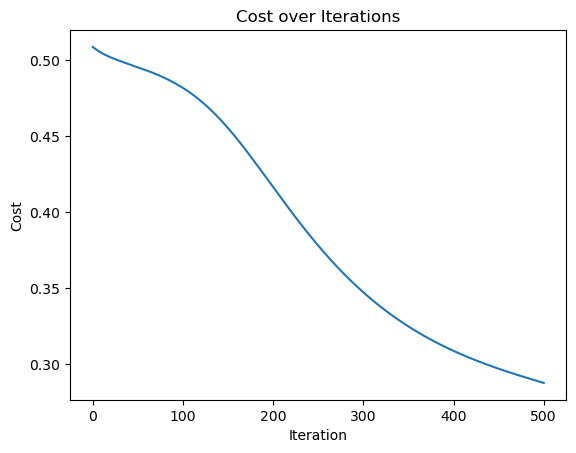

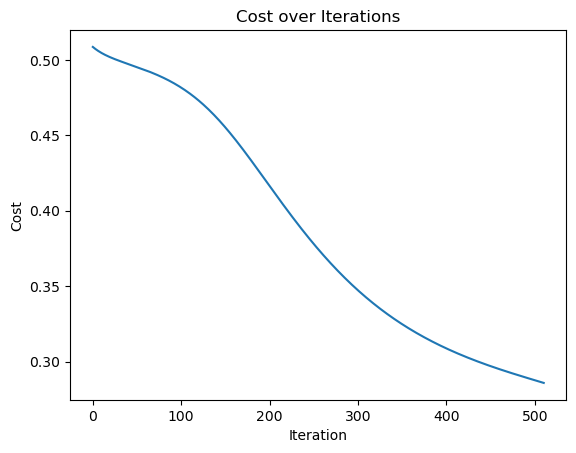

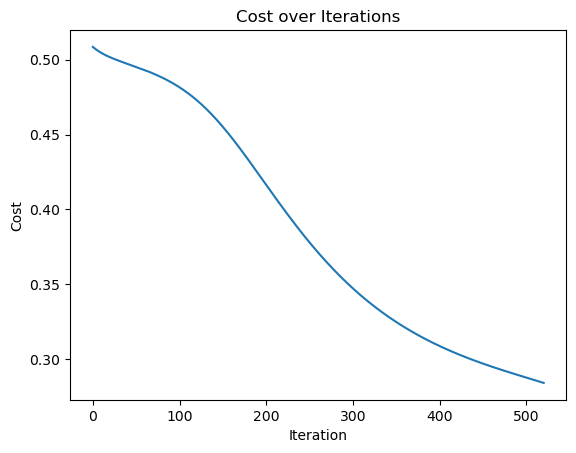

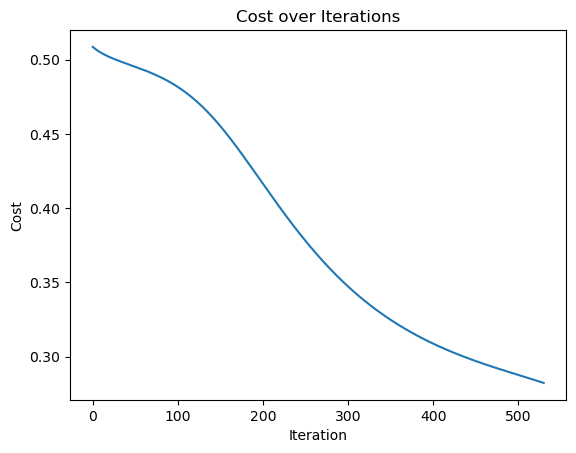

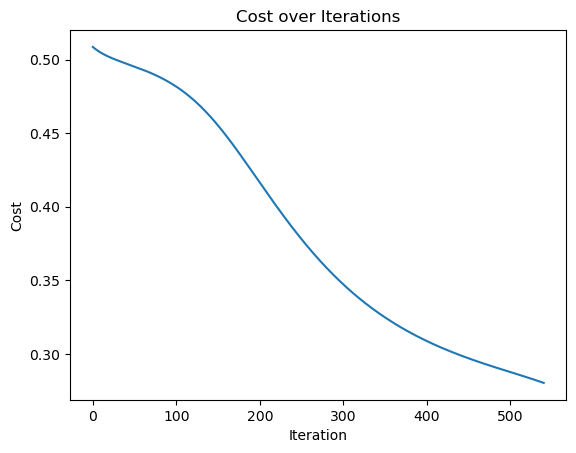

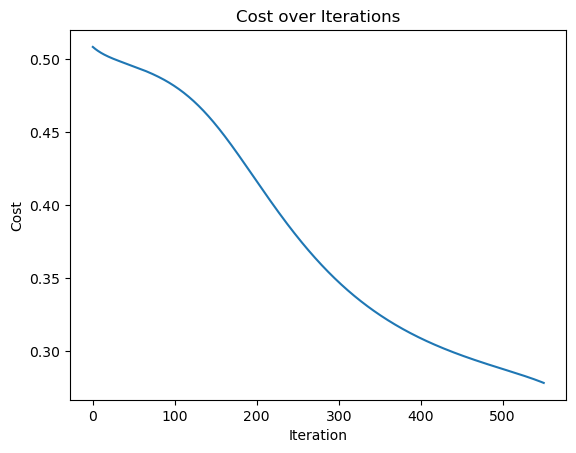

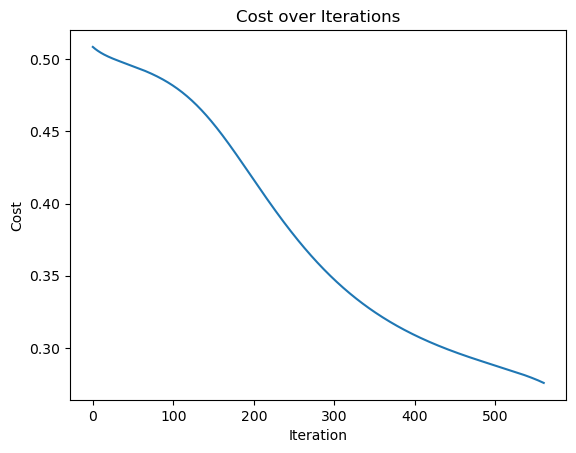

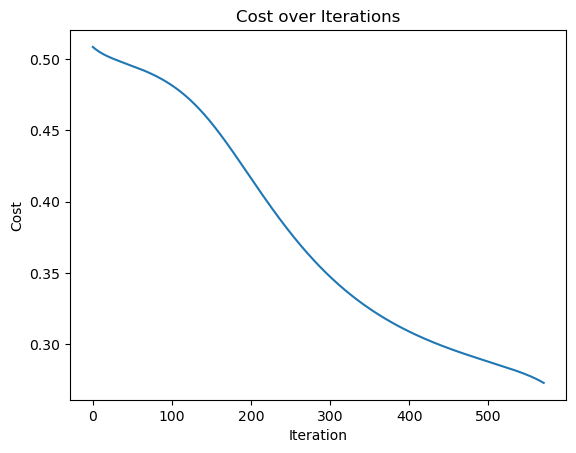

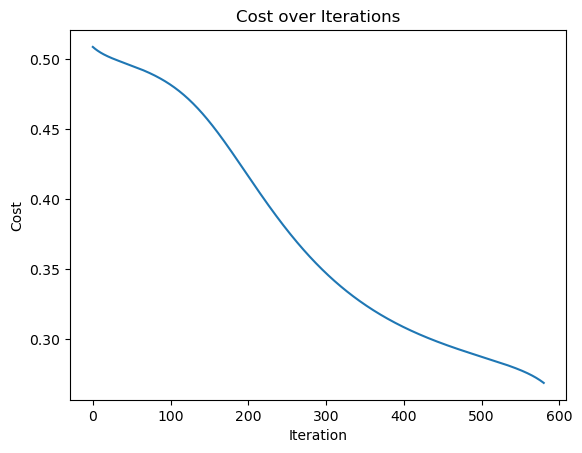

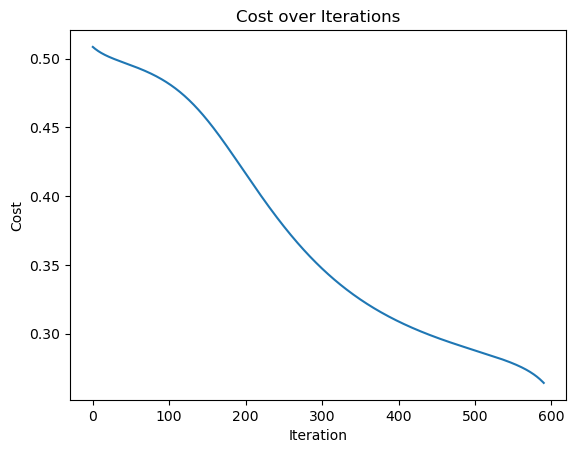

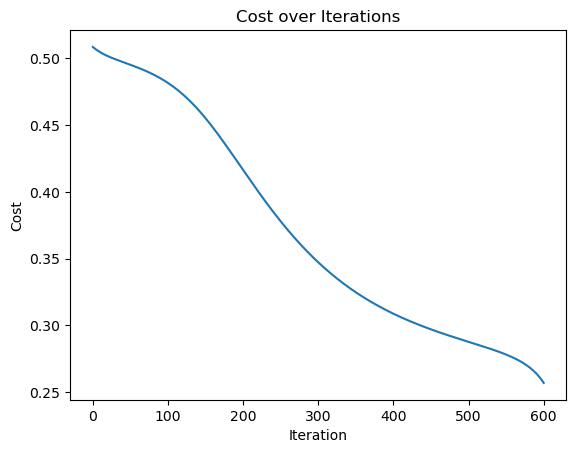

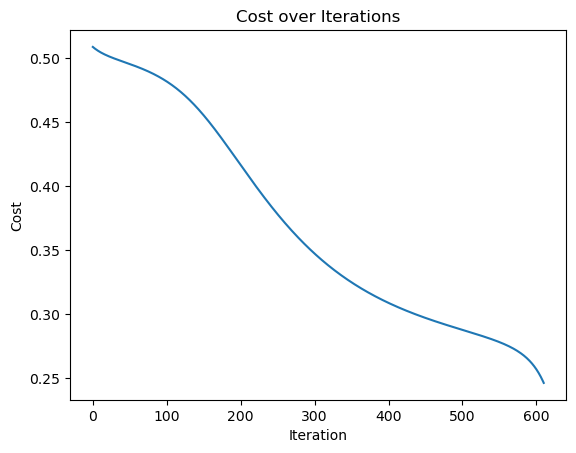

100% Acc


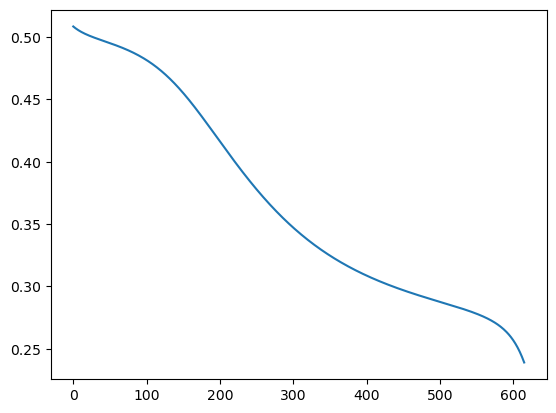

In [24]:
W1, b1, W2, b2, costs = train(X,y, 2,2,1)
plt.plot(costs)

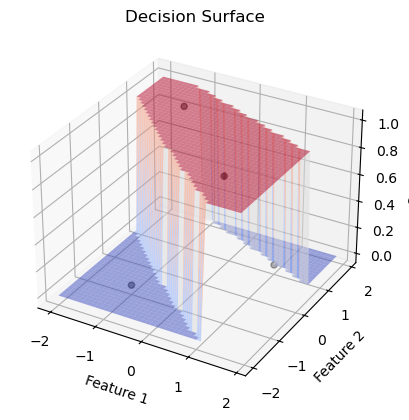

In [38]:
from mpl_toolkits.mplot3d import Axes3D

# Generate grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Flatten grid points
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Forward pass for each point on the grid
_, _, _, Z2 = Fprop(grid_points, W1, b1, W2, b2)
_,_,_,ZTrain = Fprop(X, W1,b1,W2,b2)

# Reshape predictions to match the grid and round to get binary decisions
Z = np.round(Z2.reshape(xx.shape))

# Plot decision surface with 'coolwarm' colormap
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, Z, alpha=0.5, cmap='coolwarm')

# Plot data points
ax.scatter(X[:, 0], X[:, 1], np.round(ZTrain), color='black')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Output')
ax.set_title('Decision Surface')

plt.show()

In [42]:
x = np.random.randn(3,2)
np.linalg.norm(x)

2.8355608916958404